# OpenStreetMaps (OSM) Model

## Imports

In [1]:
import sys
sys.path.insert(0, '../utils')
import model_utils
import data_utils

import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

%load_ext autoreload
#%autoreload 2

## File Locations

In [2]:
bucket_name = 'tm-geospatial'
directory = 'poverty-prediction-datasets'

ntl_summary_stats_file = '../data/nightlights_summary_stats.csv'
dhs_indicators_file = '../data/dhs_indicators.csv'

osm_roads_file = '../data/osm_roads.csv'
osm_buildings_file = '../data/osm_buildings.csv'
osm_pois_file = '../data/osm_pois.csv'

## Download Datasets

In [3]:
# Download from Google Cloud Storage
data_utils.download_from_bucket('dhs_indicators.csv', directory, dhs_indicators_file, bucket_name);
data_utils.download_from_bucket('nightlights_summary_stats.csv', directory, ntl_summary_stats_file, bucket_name);
data_utils.download_from_bucket('osm_roads.csv', directory, osm_roads_file, bucket_name);
data_utils.download_from_bucket('osm_buildings.csv', directory, osm_buildings_file, bucket_name);
data_utils.download_from_bucket('osm_pois.csv', directory, osm_pois_file, bucket_name);

../../data/open_source/private/dhs_indicators.csv successfully downloaded
../../data/open_source/public/nightlights_summary_stats.csv successfully downloaded
../../data/open_source/public/osm_roads.csv successfully downloaded
../../data/open_source/public/osm_buildings.csv successfully downloaded
../../data/open_source/public/osm_pois.csv successfully downloaded


## Load Datasets

In [3]:
# Load DHS indicators and nighttime lights
dhs_indicators = pd.read_csv(dhs_indicators_file)
ntl_summary_stats = pd.read_csv(ntl_summary_stats_file)

# Load OSM datasets
roads = pd.read_csv(osm_roads_file)
buildings = pd.read_csv(osm_buildings_file)
pois = pd.read_csv(osm_pois_file)

# Define feature columns
road_cols = roads.columns[1:]
building_cols = buildings.columns[1:]
poi_cols = pois.columns[1:]
ntl_cols = ntl_summary_stats.columns[1:]

# Get list of columns
osm_cols = list(road_cols) + list(building_cols) + list(poi_cols)
osm_ntl_cols = list(osm_cols) + list(ntl_cols)

## Combine Features

In [4]:
# Merge roads + buildings + pois
osm = roads.merge(buildings, on='DHSCLUST')
osm = osm.merge(pois, on='DHSCLUST')
print("Shape of osm dataframe: {}".format(osm.shape))

# Merge osm + nightlights
osm_ntl = osm.merge(ntl_summary_stats, on='DHSCLUST')
print("Shape of osm+ntl dataframe: {}".format(osm_ntl.shape))

# merge dhs + osm
dhs = dhs_indicators.merge(osm_ntl, left_on='Cluster number', right_on='DHSCLUST')

Shape of osm dataframe: (1214, 146)
Shape of osm+ntl dataframe: (1214, 154)


## Spearman and Pearsons Correlation

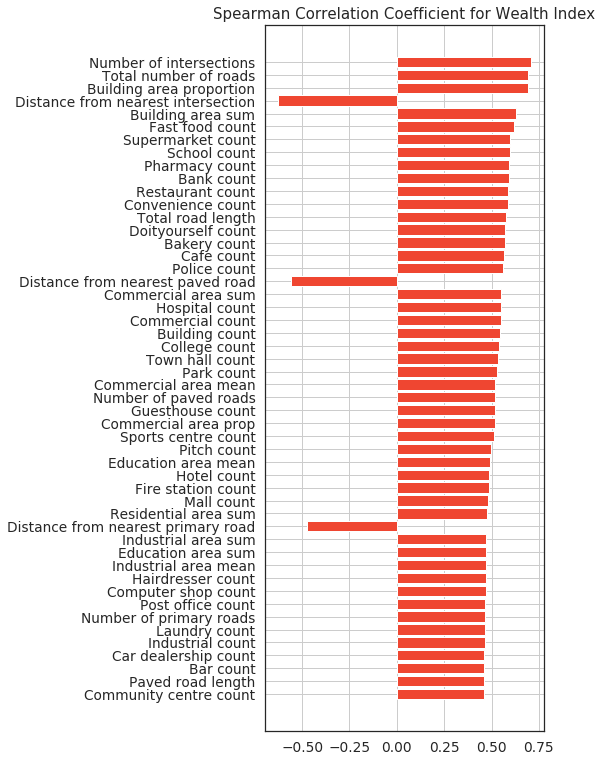

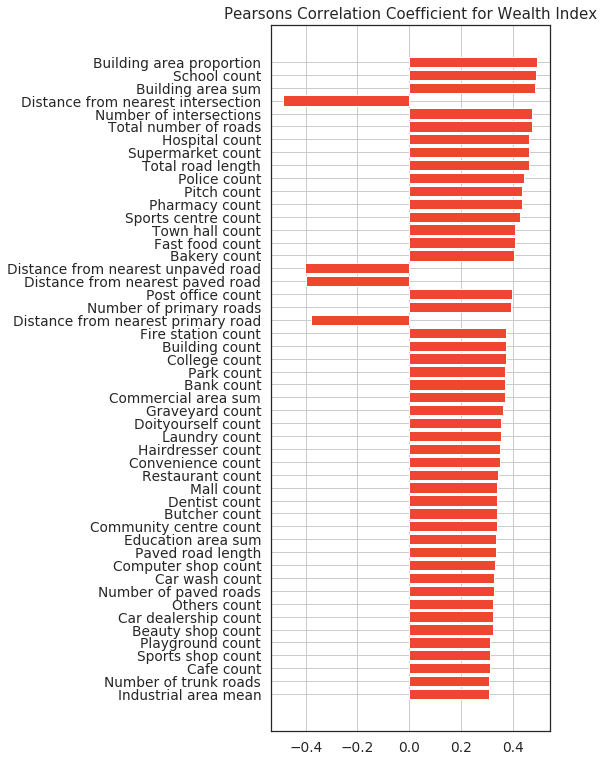

In [5]:
data_utils.plot_corr(
    data=dhs,
    features_cols=osm_cols,
    indicator = 'Wealth Index',
    max_n=50,
    figsize=(5,13)
);

## Machine Learning Pipeline

### Configuration

In [6]:
# Scoring metrics
scoring = {
    'r2': data_utils.pearsonr2,
    'rmse': data_utils.rmse
}

# Indicators of interest
indicators = [
    'Wealth Index',
    'Education completed (years)',
    'Access to electricity',
    'Access to water (minutes)'
]

## OSM Features + Nighttime Lights

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  7.3min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  7.3min finished


Socioeconomic indicator: Wealth Index
score_time : 0.4315
[0.40835643 0.45062494 0.41052985 0.48109388 0.4069922 ]
test_r2 : 0.6197
[0.59413479 0.64906646 0.62830228 0.63670092 0.59033431]
train_r2 : 0.7795
[0.78225784 0.77685467 0.77970262 0.77847449 0.78006211]
fit_time : 286.9429
[327.93823647 332.07008529 330.25748801 334.3383708  110.11009288]
test_rmse : 43860.2800
[45967.60005888 44049.50144154 40413.44814148 44076.68537627
 44794.16487477]
train_rmse : 34245.4102
[33845.71250482 34170.96340654 34775.31164972 34147.76943206
 34287.29415374]


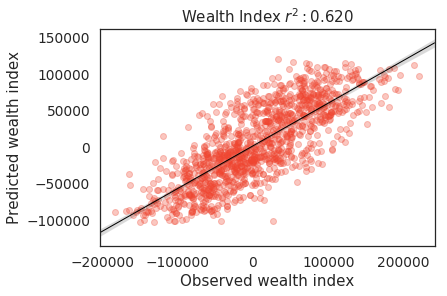

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.8min finished


Best estimator: Pipeline(memory=None,
     steps=[('regressor', RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=8,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=9, min_samples_split=3,
           min_weight_fraction_leaf=0.0, n_estimators=764, n_jobs=-1,
           oob_score=False, random_state=42, verbose=0, warm_start=False))])


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  7.4min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  7.3min finished


Socioeconomic indicator: Education completed (years)
score_time : 0.4444
[0.57077813 0.42735529 0.40698671 0.40874815 0.40811491]
test_r2 : 0.4845
[0.4771178  0.48193769 0.4315449  0.5504453  0.48148648]
train_r2 : 0.6918
[0.6920181  0.69245591 0.69943209 0.68622608 0.68897449]
fit_time : 288.1653
[331.61426044 332.25473905 334.37615085 334.09429431 108.48681164]
test_rmse : 1.6904
[1.63769357 1.79645452 1.73291577 1.64359941 1.64152338]
train_rmse : 1.3422
[1.35269156 1.32043684 1.33153951 1.34856207 1.35762566]


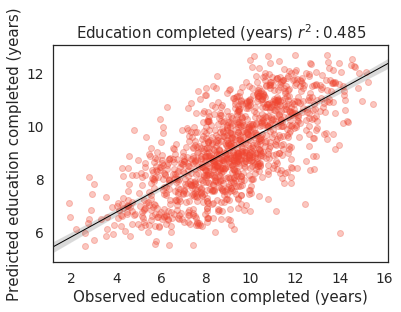

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.8min finished


Best estimator: Pipeline(memory=None,
     steps=[('regressor', RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=8,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=9, min_samples_split=3,
           min_weight_fraction_leaf=0.0, n_estimators=764, n_jobs=-1,
           oob_score=False, random_state=42, verbose=0, warm_start=False))])


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  7.7min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  7.6min finished


Socioeconomic indicator: Access to electricity
score_time : 0.5555
[0.65860915 0.53031945 0.77176738 0.40856981 0.40805483]
test_r2 : 0.3452
[0.30725338 0.30871336 0.36345204 0.39099807 0.35538759]
train_r2 : 0.5292
[0.54134164 0.51024881 0.52557187 0.53106451 0.53762967]
fit_time : 300.4663
[345.88520336 347.42845535 348.19310737 348.78729129 112.03742123]
test_rmse : 0.1184
[0.10078761 0.11579343 0.12386902 0.13015615 0.1211705 ]
train_rmse : 0.1024
[0.10564016 0.10593213 0.10116947 0.09886263 0.10061654]


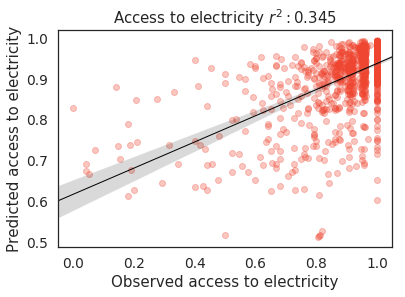

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.9min finished


Best estimator: Pipeline(memory=None,
     steps=[('regressor', RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=8,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=9, min_samples_split=3,
           min_weight_fraction_leaf=0.0, n_estimators=764, n_jobs=-1,
           oob_score=False, random_state=42, verbose=0, warm_start=False))])


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  7.6min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  7.6min finished


Socioeconomic indicator: Access to water (minutes)
score_time : 0.6084
[0.66341519 0.42238903 0.89017034 0.45761824 0.6086235 ]
test_r2 : 0.0556
[0.10947743 0.08746586 0.02091057 0.02451228 0.03571505]
train_r2 : 0.3356
[0.41121929 0.29145579 0.40565679 0.29511274 0.27445021]
fit_time : 294.2777
[320.93843794 325.13530064 341.30196548 352.93810463 131.07469583]
test_rmse : 7.9863
[12.65105481  7.97095412  6.69686517  6.0710554   6.54173818]
train_rmse : 6.9597
[5.55819418 7.34699662 7.01387296 7.41263249 7.46703554]


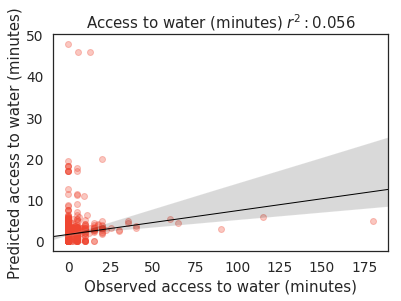

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.9min finished


Best estimator: Pipeline(memory=None,
     steps=[('regressor', RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=7,
           max_features='log2', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=6, min_samples_split=6,
           min_weight_fraction_leaf=0.0, n_estimators=969, n_jobs=-1,
           oob_score=False, random_state=42, verbose=0, warm_start=False))])


In [ ]:
predictions = model_utils.evaluate_model(
    data=dhs,
    feature_cols=osm_ntl_cols, 
    indicator_cols=indicators,
    scoring=scoring,
    model_type='random_forest', 
    refit='r2', 
    search_type='random', 
    n_splits=5, 
    n_iter=10, 
    plot_importance=False,
    verbose=2
)

## OSM Features Only

Socioeconomic indicator: Wealth Index
score_time : 0.5337
[0.65244532 0.66207647 0.51119375 0.43533421 0.4074707 ]
test_r2 : 0.5883
[0.59450307 0.60727197 0.58297363 0.60375808 0.55305839]
train_r2 : 0.7540
[0.74768085 0.75299858 0.75574587 0.75640448 0.75729353]
fit_time : 263.3474
[306.52206922 310.26949358 296.27469969 295.49303102 108.17795181]
test_rmse : 45630.1195
[45988.90500582 46296.46328057 42870.31857984 46146.38527796
 46848.52525625]
train_rmse : 36217.5609
[36077.73562941 35638.15273756 36884.94820922 36160.35087123
 36326.61687552]


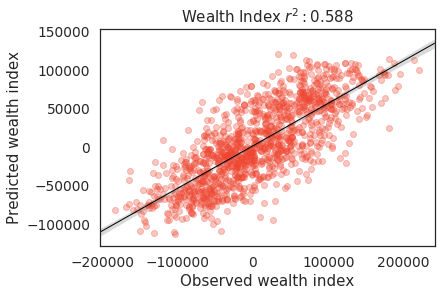

Best estimator: Pipeline(memory=None,
     steps=[('regressor', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=8, min_samples_split=6,
           min_weight_fraction_leaf=0.0, n_estimators=1244, n_jobs=-1,
           oob_score=False, random_state=42, verbose=0, warm_start=False))])


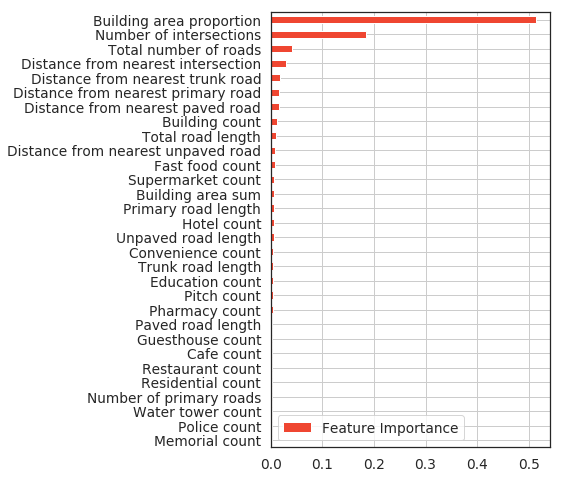

Socioeconomic indicator: Education completed (years)
score_time : 0.4483
[0.46964741 0.40795565 0.50848722 0.44744158 0.407758  ]
test_r2 : 0.4636
[0.48220645 0.45854176 0.39959129 0.53052792 0.44691195]
train_r2 : 0.6674
[0.66237725 0.66905462 0.67768631 0.66075018 0.66695038]
fit_time : 274.4261
[311.33898282 314.19669962 316.6016171  312.4189508  117.57411575]
test_rmse : 1.7261
[1.63273357 1.83820256 1.78069724 1.68287048 1.69578323]
train_rmse : 1.3999
[1.42205966 1.37652709 1.3841662  1.40636319 1.41021887]


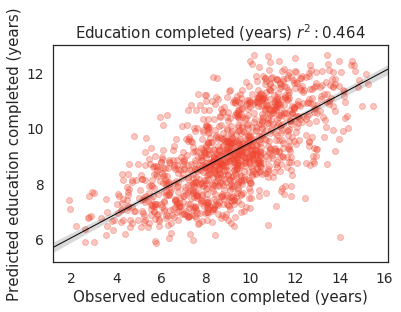

Best estimator: Pipeline(memory=None,
     steps=[('regressor', RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=8,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=9, min_samples_split=3,
           min_weight_fraction_leaf=0.0, n_estimators=764, n_jobs=-1,
           oob_score=False, random_state=42, verbose=0, warm_start=False))])


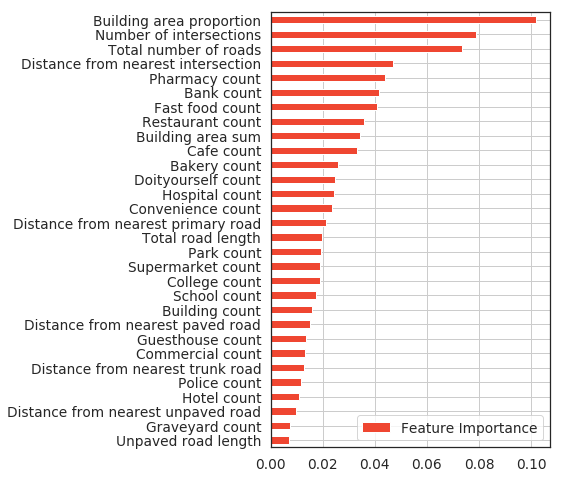

Socioeconomic indicator: Access to electricity
score_time : 0.4637
[0.6303699  0.45124125 0.42319059 0.40690589 0.40696383]
test_r2 : 0.3203
[0.2900853  0.29126758 0.34279566 0.36581913 0.31159497]
train_r2 : 0.5238
[0.51998565 0.5298667  0.5228733  0.52760578 0.51879584]
fit_time : 267.2587
[308.20247293 307.25751328 308.23941255 309.90234423 102.69152021]
test_rmse : 0.1204
[0.10021654 0.11719984 0.1267357  0.1324464  0.12558519]
train_rmse : 0.1042
[0.10949227 0.10456677 0.10272795 0.10068679 0.10337994]


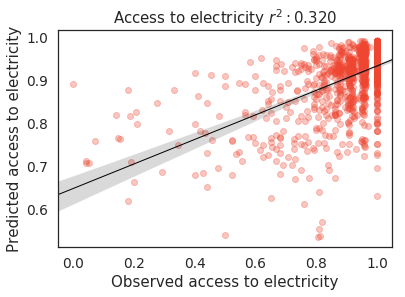

Best estimator: Pipeline(memory=None,
     steps=[('regressor', RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=8,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=9, min_samples_split=3,
           min_weight_fraction_leaf=0.0, n_estimators=764, n_jobs=-1,
           oob_score=False, random_state=42, verbose=0, warm_start=False))])


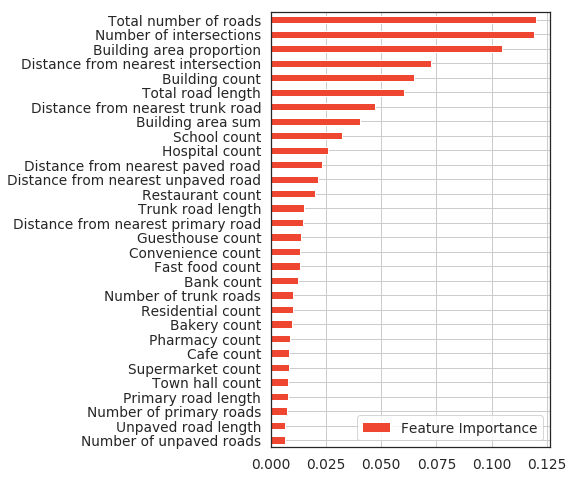

Socioeconomic indicator: Access to water (minutes)
score_time : 0.5462
[0.43436694 0.57920289 0.48236489 0.42035699 0.81449747]
test_r2 : 0.0492
[0.11155539 0.0578052  0.01939557 0.0104736  0.04680941]
train_r2 : 0.3623
[0.41944692 0.31506968 0.36089821 0.30638032 0.40968386]
fit_time : 263.8063
[291.54733896 297.31446123 307.14456916 313.20773053 109.81753302]
test_rmse : 7.8163
[12.66137682  8.06386413  6.70330831  6.12498088  5.52800111]
train_rmse : 6.9478
[5.55459101 7.33060047 7.21812758 7.35314669 7.28277649]


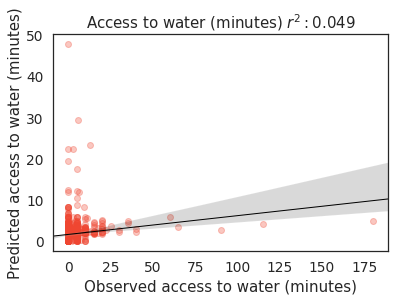

Best estimator: Pipeline(memory=None,
     steps=[('regressor', RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=7,
           max_features='log2', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=6, min_samples_split=6,
           min_weight_fraction_leaf=0.0, n_estimators=969, n_jobs=-1,
           oob_score=False, random_state=42, verbose=0, warm_start=False))])


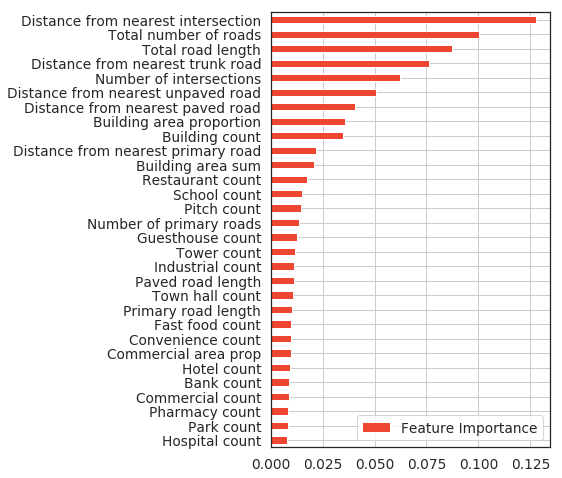

In [11]:
predictions = model_utils.evaluate_model(
    data=dhs,
    feature_cols=osm_cols, 
    indicator_cols=indicators,
    scoring=scoring,
    model_type='random_forest', 
    refit='r2', 
    search_type='random', 
    n_splits=5, 
    n_iter=10, 
    plot_importance=True
)

### Road Features

Socioeconomic indicator: Wealth Index
score_time : 0.5986
[0.61774254 0.6085403  0.54695559 0.61070466 0.60898733]
test_r2 : 0.5494
[0.52483693 0.57239685 0.54892386 0.56635898 0.53436962]
train_r2 : 0.7743
[0.77918187 0.77616808 0.77303519 0.77384021 0.76944245]
fit_time : 168.4470
[188.85891867 191.56332469 190.3362546  191.2659266   80.21078634]
test_rmse : 47682.5946
[49974.32622959 48256.92937517 44558.49222033 47930.32295679
 47692.90222419]
train_rmse : 34739.4074
[34222.71905797 34349.33744521 35367.28001309 34606.70901179
 35150.99145233]


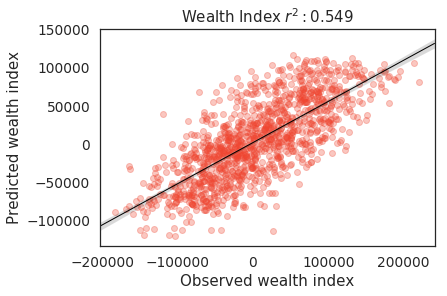

Best estimator: Pipeline(memory=None,
     steps=[('regressor', RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=7,
           max_features='log2', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=6, min_samples_split=6,
           min_weight_fraction_leaf=0.0, n_estimators=969, n_jobs=-1,
           oob_score=False, random_state=42, verbose=0, warm_start=False))])


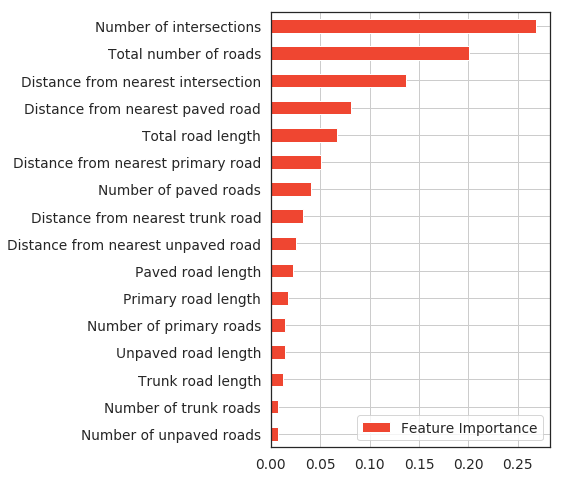

Socioeconomic indicator: Education completed (years)
score_time : 0.6117
[0.59833789 0.60887694 0.82653594 0.41613436 0.60869455]
test_r2 : 0.4248
[0.41333367 0.44425431 0.36114607 0.49228033 0.41319505]
train_r2 : 0.6548
[0.71273445 0.62895596 0.52115454 0.70477885 0.70616766]
fit_time : 169.3395
[189.3688488  193.4084475  191.00745964 190.17940307  82.73358893]
test_rmse : 1.7833
[1.74196997 1.8542204  1.83885879 1.73537016 1.74586441]
train_rmse : 1.4098
[1.3185206  1.43391394 1.64744469 1.32031501 1.32862488]


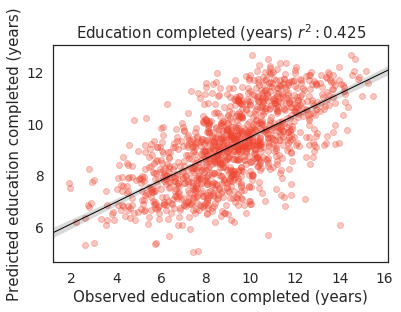

Best estimator: Pipeline(memory=None,
     steps=[('regressor', RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=6,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=6, min_samples_split=3,
           min_weight_fraction_leaf=0.0, n_estimators=1415, n_jobs=-1,
           oob_score=False, random_state=42, verbose=0, warm_start=False))])


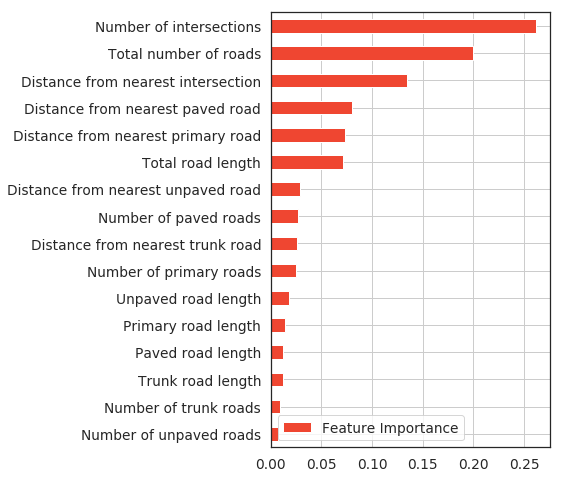

Socioeconomic indicator: Access to electricity
score_time : 0.5432
[0.44685984 0.63735604 0.80983567 0.41455364 0.40747857]
test_r2 : 0.2889
[0.27197624 0.26423526 0.30087113 0.33197593 0.27526861]
train_r2 : 0.4892
[0.56977945 0.42367144 0.4157049  0.6440999  0.39262577]
fit_time : 169.0872
[189.57751465 191.33963585 192.30313087 191.82636905  80.38923049]
test_rmse : 0.1239
[0.10719197 0.11937063 0.12957705 0.13493326 0.12850498]
train_rmse : 0.1058
[0.1028627  0.11287431 0.11068739 0.08876552 0.11375966]


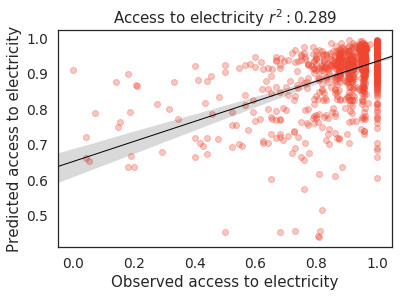

Best estimator: Pipeline(memory=None,
     steps=[('regressor', RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=8,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=9, min_samples_split=3,
           min_weight_fraction_leaf=0.0, n_estimators=764, n_jobs=-1,
           oob_score=False, random_state=42, verbose=0, warm_start=False))])


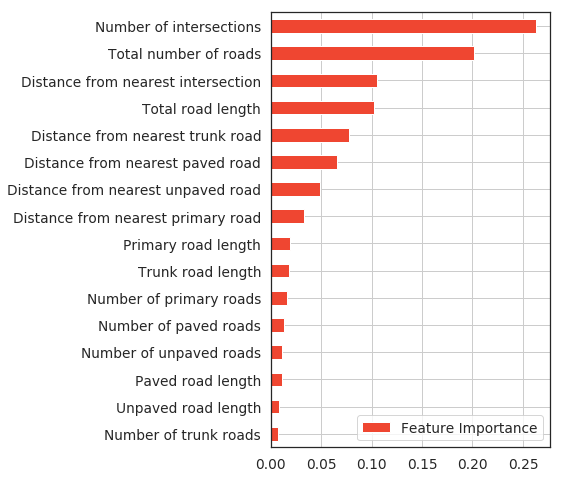

Socioeconomic indicator: Access to water (minutes)
score_time : 0.4363
[0.4317255  0.41984463 0.31346226 0.40811133 0.60842419]
test_r2 : 0.0492
[0.13868705 0.05279088 0.01010914 0.02503929 0.01940175]
train_r2 : 0.4004
[0.49607607 0.38001558 0.43522787 0.3423098  0.34848716]
fit_time : 169.0318
[184.33562398 189.23727655 190.50925612 195.52674627  85.5499475 ]
test_rmse : 8.1104
[12.50074506  8.06611525  6.77051712  6.46791423  6.74648316]
train_rmse : 6.5883
[5.20185347 6.70275343 6.80098126 7.1601781  7.07581617]


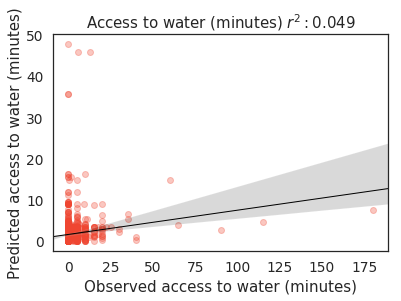

Best estimator: Pipeline(memory=None,
     steps=[('regressor', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=8, min_samples_split=6,
           min_weight_fraction_leaf=0.0, n_estimators=1244, n_jobs=-1,
           oob_score=False, random_state=42, verbose=0, warm_start=False))])


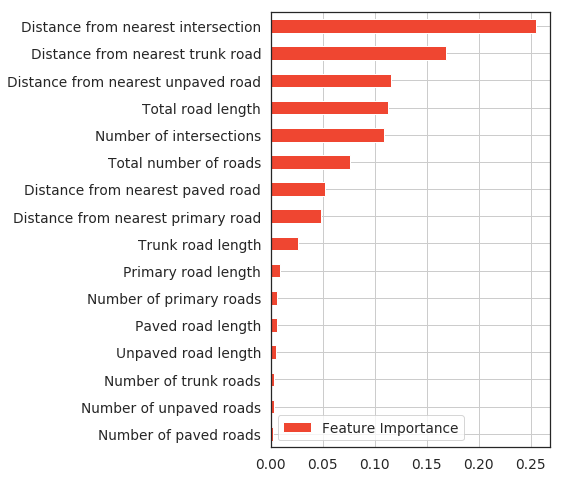

In [8]:
predictions = model_utils.evaluate_model(
    data=dhs,
    feature_cols=road_cols, 
    indicator_cols=indicators,
    scoring=scoring,
    model_type='random_forest', 
    refit='r2', 
    search_type='random', 
    n_splits=5, 
    n_iter=10, 
    plot_importance=True
)

## Buildings

Socioeconomic indicator: Wealth Index
score_time : 0.6297
[0.62509274 0.64185286 0.6205442  0.65315747 0.60781479]
test_r2 : 0.5201
[0.51770122 0.55211775 0.52577736 0.5285117  0.47618063]
train_r2 : 0.6423
[0.63612115 0.63668648 0.64303056 0.64265941 0.65320567]
fit_time : 139.0915
[150.6089077  156.36468625 156.01996517 156.1051085   76.35883427]
test_rmse : 49156.6530
[49921.26309166 49296.7524424  45786.49462701 49771.50084966
 51007.25420365]
train_rmse : 42619.0200
[42755.34403929 42580.12355497 43254.12592434 42363.19934631
 42142.30720189]


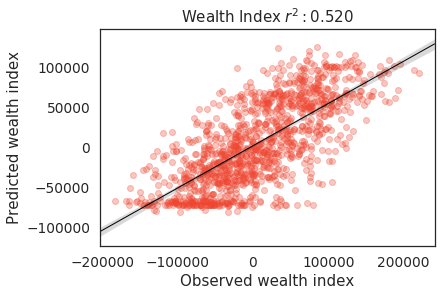

Best estimator: Pipeline(memory=None,
     steps=[('regressor', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=8, min_samples_split=6,
           min_weight_fraction_leaf=0.0, n_estimators=1244, n_jobs=-1,
           oob_score=False, random_state=42, verbose=0, warm_start=False))])


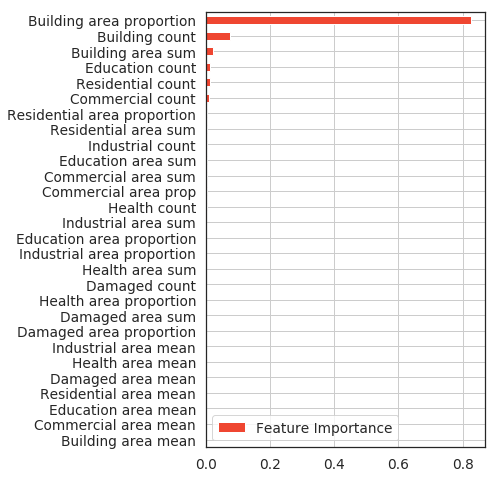

Socioeconomic indicator: Education completed (years)
score_time : 0.6314
[0.63775444 0.6422739  0.65797377 0.61074257 0.60816026]
test_r2 : 0.4074
[0.42116032 0.41252086 0.3488425  0.4422686  0.41216998]
train_r2 : 0.5459
[0.53257783 0.54272708 0.56352788 0.5377449  0.55297057]
fit_time : 139.9007
[153.26632953 156.35412169 157.06175756 157.2776227   75.5437901 ]
test_rmse : 1.8092
[1.71670261 1.90322063 1.86709935 1.80457431 1.75455659]
train_rmse : 1.5900
[1.62548257 1.57199381 1.56745018 1.59319577 1.59176811]


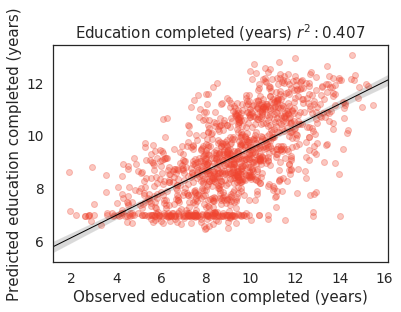

Best estimator: Pipeline(memory=None,
     steps=[('regressor', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=8, min_samples_split=6,
           min_weight_fraction_leaf=0.0, n_estimators=1244, n_jobs=-1,
           oob_score=False, random_state=42, verbose=0, warm_start=False))])


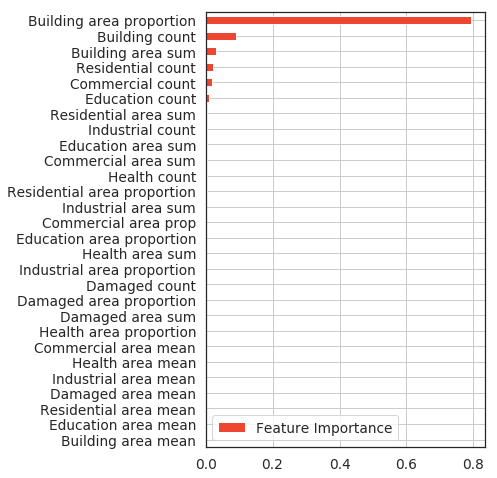

Socioeconomic indicator: Access to electricity
score_time : 0.5881
[0.41862392 0.62392569 0.6737268  0.61649108 0.607651  ]
test_r2 : 0.2195
[0.17682278 0.22073901 0.22018995 0.27646171 0.20337674]
train_r2 : 0.3595
[0.36704118 0.35150491 0.36504369 0.34589938 0.36807779]
fit_time : 141.7306
[156.048311   158.83244014 158.44561481 159.13018274  76.19652414]
test_rmse : 0.1280
[0.10721947 0.12286805 0.13661025 0.13840568 0.13499672]
train_rmse : 0.1167
[0.12130693 0.11861782 0.11434417 0.11417892 0.1149555 ]


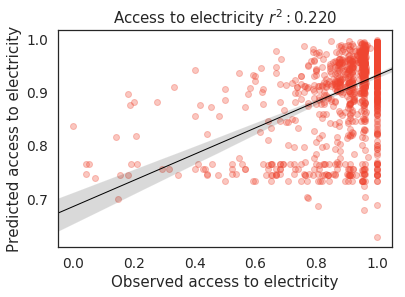

Best estimator: Pipeline(memory=None,
     steps=[('regressor', RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=8,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=9, min_samples_split=3,
           min_weight_fraction_leaf=0.0, n_estimators=764, n_jobs=-1,
           oob_score=False, random_state=42, verbose=0, warm_start=False))])


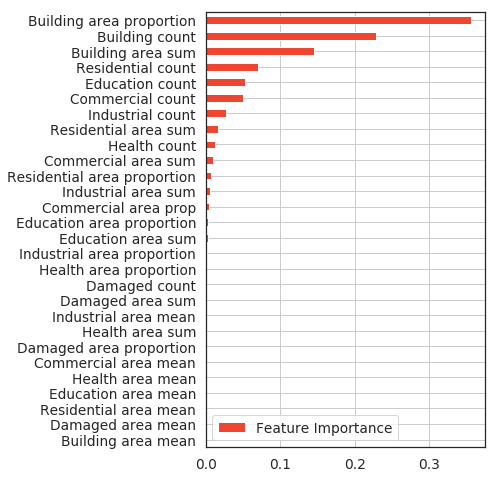

Socioeconomic indicator: Access to water (minutes)
score_time : 0.5367
[0.40684962 0.61942744 0.43624496 0.61178541 0.60931587]
test_r2 : 0.0396
[0.03055715 0.01713482 0.02622382 0.05955411 0.06446945]
train_r2 : 0.1362
[0.23075081 0.06137345 0.10769408 0.14405405 0.13703165]
fit_time : 130.3122
[140.5075047  143.18498516 144.91549873 148.13590789  74.81733012]
test_rmse : 7.5925
[12.88171717  8.20385109  6.62162162  5.00266496  5.25263538]
train_rmse : 7.6898
[5.91593297 7.96086658 8.14560832 8.23077349 8.19560256]


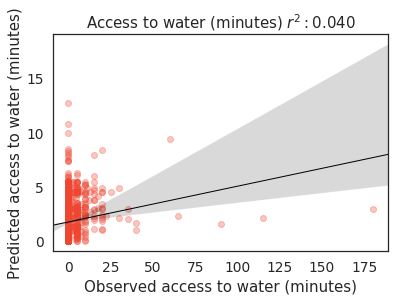

Best estimator: Pipeline(memory=None,
     steps=[('regressor', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=8, min_samples_split=6,
           min_weight_fraction_leaf=0.0, n_estimators=1244, n_jobs=-1,
           oob_score=False, random_state=42, verbose=0, warm_start=False))])


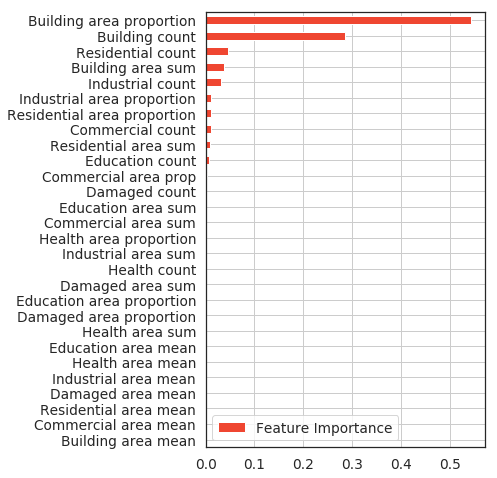

In [9]:
predictions = model_utils.evaluate_model(
    data=dhs,
    feature_cols=building_cols, 
    indicator_cols=indicators,
    scoring=scoring,
    model_type='random_forest', 
    refit='r2', 
    search_type='random', 
    n_splits=5, 
    n_iter=10, 
    plot_importance=True
)

## Points of Interest

Socioeconomic indicator: Wealth Index
score_time : 0.4974
[0.40821266 0.44151711 0.61183047 0.41650462 0.60886192]
test_r2 : 0.4930
[0.48576332 0.50240836 0.48364347 0.5257034  0.46756247]
train_r2 : 0.6122
[0.60698059 0.60490689 0.6208549  0.60391323 0.62449922]
fit_time : 148.6455
[163.86241436 164.96424651 168.81240869 166.106812    79.48152494]
test_rmse : 50679.2548
[52055.10310068 52138.46270501 47618.30078773 50470.96037596
 51113.44690349]
train_rmse : 44733.8900
[44915.4301664  44841.71098556 44775.58226413 45097.9381602
 44038.78845818]


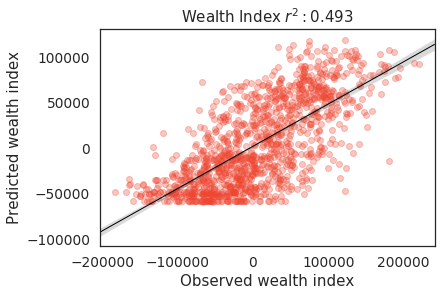

Best estimator: Pipeline(memory=None,
     steps=[('regressor', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=8, min_samples_split=6,
           min_weight_fraction_leaf=0.0, n_estimators=1244, n_jobs=-1,
           oob_score=False, random_state=42, verbose=0, warm_start=False))])


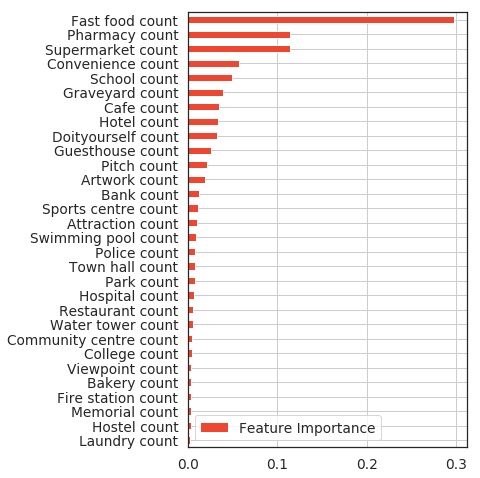

Socioeconomic indicator: Education completed (years)
score_time : 0.4730
[0.4887197  0.412045   0.44147849 0.61536455 0.40739131]
test_r2 : 0.3999
[0.40387199 0.38474914 0.34077853 0.46946558 0.40062957]
train_r2 : 0.5180
[0.51732513 0.51965328 0.5329938  0.49996737 0.52019746]
fit_time : 146.5340
[163.31613255 164.74245262 163.64111376 164.55800152  76.41243291]
test_rmse : 1.8255
[1.75186509 1.95350481 1.86392257 1.79253083 1.7656094 ]
train_rmse : 1.6498
[1.66459811 1.62115592 1.632059   1.67217716 1.6590081 ]


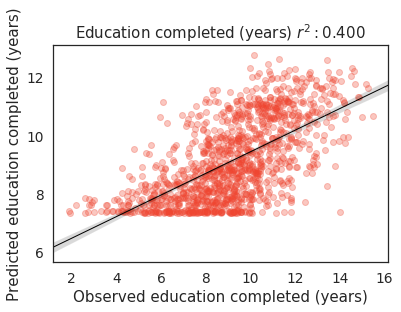

Best estimator: Pipeline(memory=None,
     steps=[('regressor', RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=8,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=9, min_samples_split=3,
           min_weight_fraction_leaf=0.0, n_estimators=764, n_jobs=-1,
           oob_score=False, random_state=42, verbose=0, warm_start=False))])


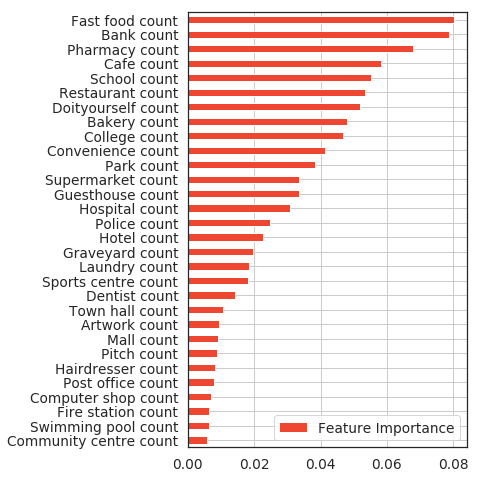

Socioeconomic indicator: Access to electricity
score_time : 0.4180
[0.42884827 0.40870833 0.40809965 0.4371767  0.40702796]
test_r2 : 0.1959
[0.20260324 0.18860597 0.18650164 0.2362451  0.16532861]
train_r2 : 0.2521
[0.25071692 0.25478257 0.24903059 0.24679127 0.25932636]
fit_time : 148.5066
[164.53863955 166.96571684 167.76271057 166.00709963  77.25886226]
test_rmse : 0.1302
[0.10378146 0.12550634 0.14005503 0.14410693 0.13772354]
train_rmse : 0.1264
[0.13232191 0.12763235 0.12457293 0.12287116 0.12474962]


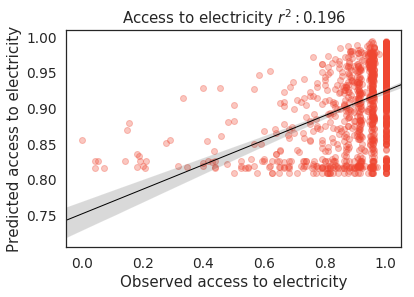

Best estimator: Pipeline(memory=None,
     steps=[('regressor', RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=8,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=9, min_samples_split=3,
           min_weight_fraction_leaf=0.0, n_estimators=764, n_jobs=-1,
           oob_score=False, random_state=42, verbose=0, warm_start=False))])


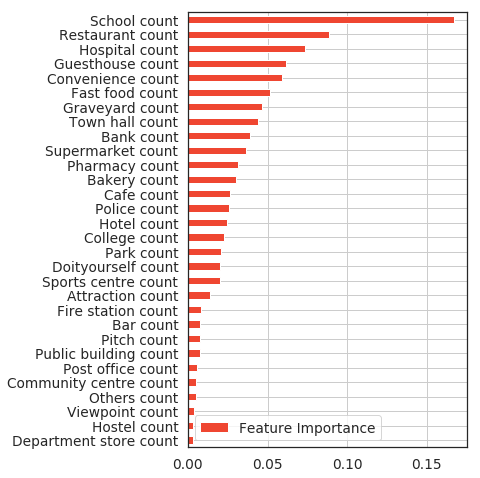

Socioeconomic indicator: Access to water (minutes)
score_time : 0.5634
[0.40821052 0.58005881 0.51018906 0.51014233 0.80857301]
test_r2 : 0.0538
[0.04432415 0.05460315 0.01326409 0.06173657 0.09520526]
train_r2 : 0.1011
[0.1479197  0.09845529 0.07368231 0.0888652  0.09665937]
fit_time : 137.2213
[153.31664753 149.80923796 153.28667283 153.56634569  76.12735748]
test_rmse : 7.5137
[12.82857496  8.06123124  6.69174147  4.84972087  5.13698815]
train_rmse : 7.8169
[6.06768448 7.85380438 8.25196698 8.49154058 8.41956476]


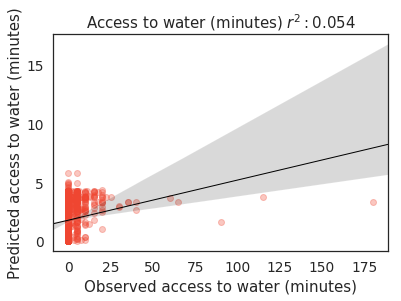

Best estimator: Pipeline(memory=None,
     steps=[('regressor', RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=7,
           max_features='log2', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=6, min_samples_split=6,
           min_weight_fraction_leaf=0.0, n_estimators=969, n_jobs=-1,
           oob_score=False, random_state=42, verbose=0, warm_start=False))])


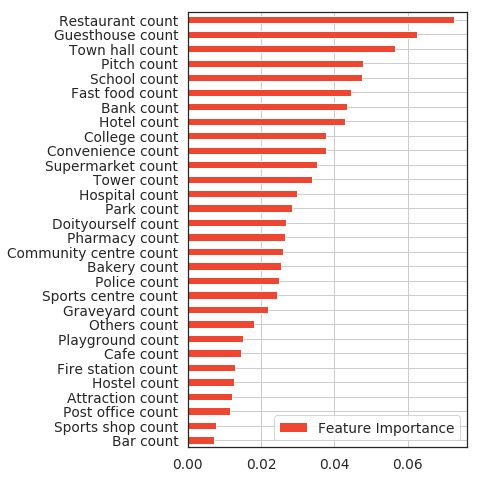

In [10]:
predictions = model_utils.evaluate_model(
    data=dhs,
    feature_cols=poi_cols, 
    indicator_cols=indicators,
    scoring=scoring,
    model_type='random_forest', 
    refit='r2', 
    search_type='random', 
    n_splits=5, 
    n_iter=10, 
    plot_importance=True
)